# Translation statistics
In this notebook we will check statistics related to the translation generated for QALD9-ES, and compare them with the original translations of QALD9.

First let's import the translations:

In [1]:
import pandas as pd

test_set = pd.read_excel('../Review files/qald9_test_set_review_table.xlsx')
train_set = pd.read_excel('../Review files/qald9_train_set_review_table.xlsx')

## Original QALD9 translations statistics
While translating, the translator classified each original translation under seven cases (not necessarily exclusive):
- Case 1: Minor translation mistakes within the question or keywords
- Case 2: Issues with entity proper names translation within the question or the keywords
- Case 3: Major translation errors in the question
- Case 4: Wrong translation of question keywords
- Case 5: Lack of ortographic accent within the question or the keywords
- Case 6: Correct translation of the question that requires modification to be more natural
- Case 7: Correct translation of the question that doesn't require modification

Let's check how many of each case were found.

In [2]:
train_set.count()

id                    408
en_question           408
es_question           385
native_translation    408
en_keywords           408
es_keywords           405
native_keywords       407
Case 1                 58
Case 2                 45
Case 3                 56
Case 4                226
Case 5                101
Case 6                150
Case 7                123
dtype: int64

In [3]:
test_set.count()

id                    150
en_question           150
es_question           150
native_translation    150
en_keywords           150
es_keywords           150
native_keywords       150
Case 1                 19
Case 2                 18
Case 3                 16
Case 4                 86
Case 5                 42
Case 6                 45
Case 7                 55
dtype: int64

We came to the following conclusions:
- The training dataset contains 408 questions where 123 had correct question translations (case 7), 150 questions had correct translations that were modified in order to be more natural (case 6), 101 of the questions had mistakes related to ortographic accents within the question string or the question keywords (case 5), 226 questions required modifications within their key words (case 4), 56 questions had major translation issues where 23 didn't have a translation and 33 had poor translations where the question lost its original meaning (case 3), in 45 questions there were problems with the translation of proper names within the question string or the keywords (case 2), and 58 questions had minor translation mistakes within the question string or keywords (case 1).
- The testing dataset contains 150 questions where 55 had correct question translations (case 7), 44 questions had correct translations that were modified in order to be more natural (case 6), 42 of the questions had mistakes related to ortographic accents within the question string or the question keywords (case 5), 85 questions required modifications within their key words (case 4), 16 questions had major translation issues, poor translations where the question lost its original meaning (case 3), in 18 questions there were problems with the translation of proper names within the question string or the keywords (case 2), and 19 questions had minor translation mistakes within the question string or keywords (case 1).

In total from 558 questions we'vefound 74 questions relatedto case 1, 63 questions related to case 2, 73 questions related to case 3, 301 questions related to case 4, 143 questions related to case 5, 169 questions related to case 6 and 188 questions related to case  7.

From this information we've generated the following plots:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_cases = dict(train_set.count())
train_cases['no_translation'] = train_cases.get('en_question') - train_cases.get('es_question')

test_cases = dict(test_set.count())
test_cases['no_translation'] = test_cases.get('en_question') - test_cases.get('es_question')

total_cases = {}
for key,value in list(train_cases.items()):
    total_cases[key] = value + test_cases.get(key)

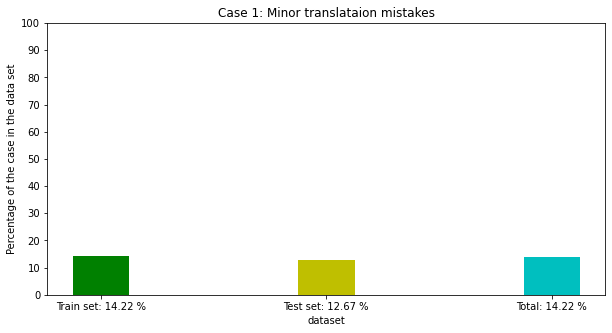

In [114]:
# Case 1

def plot_case(case, train_cases, test_cases, title):

    case_y = [ round( train_cases.get(case) / train_cases.get('en_question') *100 ,2),
               round( test_cases.get(case) / test_cases.get('en_question') *100 ,2),
              round( (train_cases.get(case) + test_cases.get('Case 1') ) / (train_cases.get('en_question') + test_cases.get('en_question'))*100 ,2)]

    case_x = ['Train set: ' + str(case_y[0]) + ' %', 'Test set: ' + str(case_y[1]) + ' %', 'Total: ' + str(case_y[0]) + ' %']
    fig = plt.figure(figsize = (10, 5))
    plt.bar(case_x, case_y, color =['g', 'y', 'c'],
        width = 0.25)
    plt.ylim([0, 100])
    plt.yticks([0,10,20,30,40,50,60,70,80,90, 100])
    plt.xlabel("dataset")
    plt.ylabel("Percentage of the case in the data set")
    plt.title(title)
    plt.show()
    
    
plot_case('Case 1', train_cases, test_cases, 'Case 1: Minor translataion mistakes')

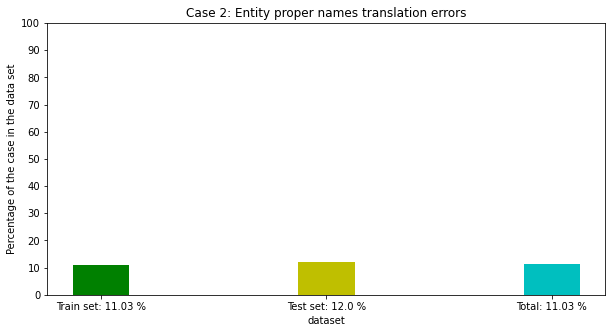

In [115]:
plot_case('Case 2', train_cases, test_cases, 'Case 2: Entity proper names translation errors')

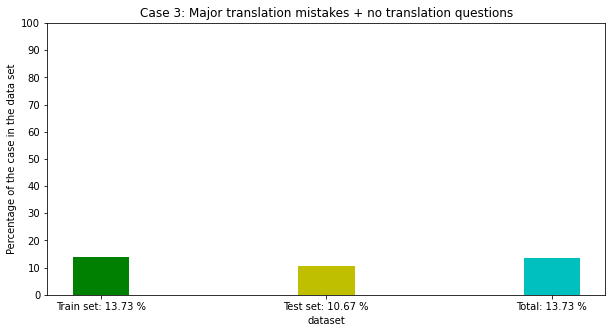

In [116]:
plot_case('Case 3', train_cases, test_cases, 'Case 3: Major translation mistakes + no translation questions')

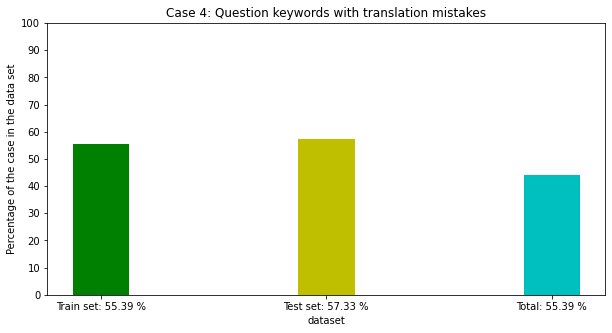

In [117]:
plot_case('Case 4', train_cases, test_cases, 'Case 4: Question keywords with translation mistakes')

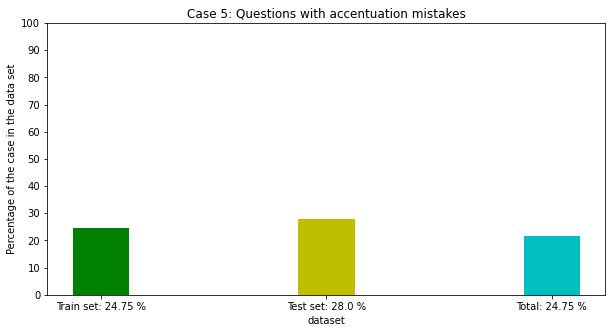

In [118]:

plot_case('Case 5', train_cases, test_cases, 'Case 5: Questions with accentuation mistakes')

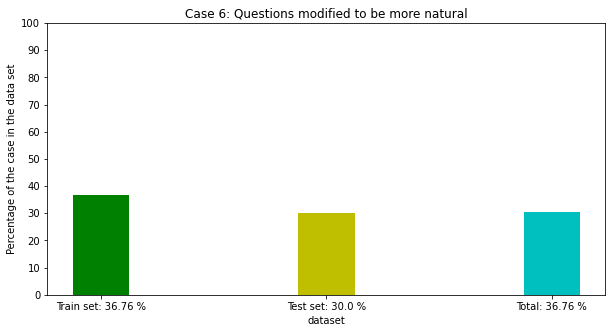

In [119]:
plot_case('Case 6', train_cases, test_cases, 'Case 6: Questions modified to be more natural')

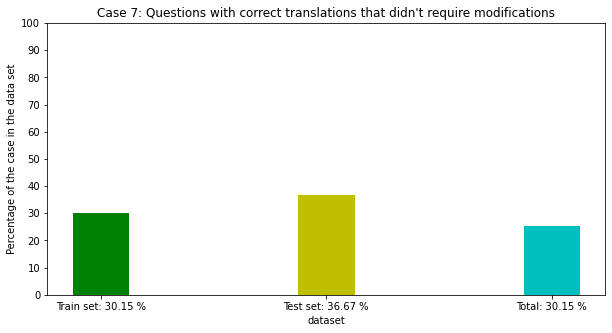

In [120]:
plot_case('Case 7', train_cases, test_cases, 'Case 7: Questions with correct translations that didn\'t require modifications')

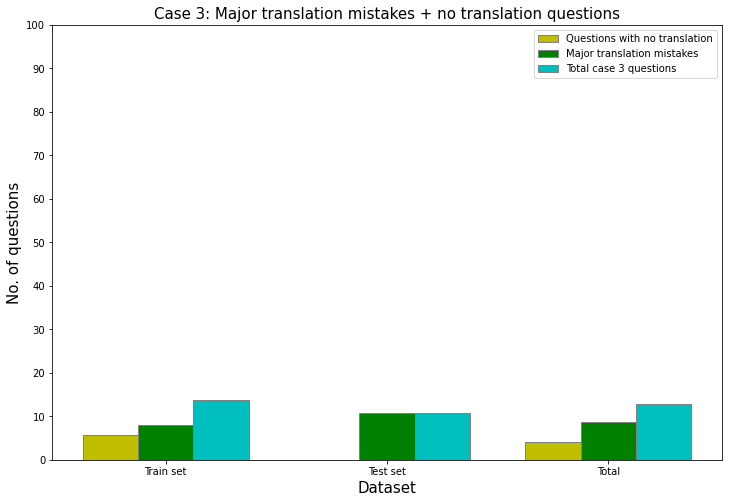

In [121]:
# Case 3
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
train_no_translataion = train_cases.get('en_question') - train_cases.get('es_question')
test_no_translataion = test_cases.get('en_question') - test_cases.get('es_question')
total_no_translataion = train_no_translataion + test_no_translataion

per_train_no_translataion = round(train_no_translataion / train_cases.get('en_question') *100, 2)
per_test_no_translataion = round(test_no_translataion / test_cases.get('en_question') *100, 2)
per_total_no_translation = round( total_no_translataion/(train_cases.get('en_question') + test_cases.get('en_question'))*100,2)

not_transltion = [ per_train_no_translataion, per_test_no_translataion, per_total_no_translation ]

train_misstranslation = train_cases.get('Case 3') - train_no_translataion
test_misstranslation = test_cases.get('Case 3') - test_no_translataion
total_misstranslation = train_misstranslation + test_misstranslation

per_train_misstranslation = round(train_misstranslation / train_cases.get('en_question') *100, 2)
per_test_misstranslation = round(test_misstranslation / test_cases.get('en_question') *100, 2)
per_total_misstranslation = round( total_misstranslation/(train_cases.get('en_question') + test_cases.get('en_question'))*100,2)

miss_translation = [ per_train_misstranslation, per_test_misstranslation, per_total_misstranslation ]

total_train = round(train_cases.get('Case 3') / (train_cases.get('en_question'))*100,2)
total_test = round(test_cases.get('Case 3') / (test_cases.get('en_question'))*100,2)
total_total = round((train_cases.get('Case 3')+test_cases.get('Case 3')) / (train_cases.get('en_question')+test_cases.get('en_question'))*100,2)

total = [ total_train, total_test,total_total ]

br1 = np.arange(len(not_transltion))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, not_transltion, color ='y', width = barWidth,
        edgecolor ='grey', label ='Questions with no translation')
plt.bar(br2, miss_translation, color ='g', width = barWidth,
        edgecolor ='grey', label ='Major translation mistakes')
plt.bar(br3, total, color ='c', width = barWidth,
        edgecolor ='grey', label ='Total case 3 questions')

plt.ylim([0, 100])
plt.yticks([0,10,20,30,40,50,60,70,80,90, 100])
plt.title("Case 3: Major translation mistakes + no translation questions", fontsize=15)
plt.xlabel('Dataset', fontsize = 15)
plt.ylabel('No. of questions', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(not_transltion))],
        ['Train set',
         'Test set' , 
         'Total'])

plt.legend()
plt.show()

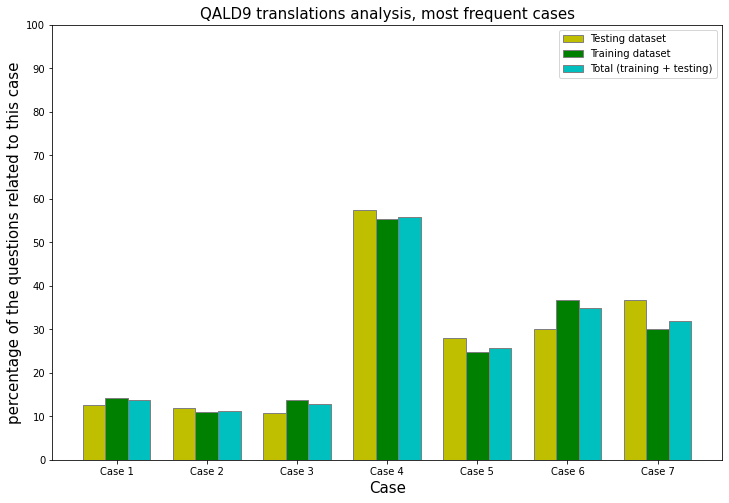

In [110]:
def get_porcentge(case, dataset):
    occurrences = dataset.get(case)
    return round( occurrences / dataset.get('en_question') *100 ,2)

def get_values(dataset):
    return [get_porcentge('Case 1', dataset),
            get_porcentge('Case 2', dataset),
            get_porcentge('Case 3', dataset),
            get_porcentge('Case 4', dataset),
            get_porcentge('Case 5', dataset),
            get_porcentge('Case 6', dataset),
            get_porcentge('Case 7', dataset)]

cases_val_training = get_values(train_cases)
cases_val_testing = get_values(test_cases)
cases_val_total = get_values(total_cases)

cases = ['Case 1', 
        'Case 2',
        'Case 3',
        'Case 4', 
        'Case 5',
        'Case 6',
        'Case 7']

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(cases_val_testing))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, cases_val_testing, color ='y', width = barWidth,
        edgecolor ='grey', label ='Testing dataset')
plt.bar(br2, cases_val_training, color ='g', width = barWidth,
        edgecolor ='grey', label ='Training dataset')
plt.bar(br3, cases_val_total, color ='c', width = barWidth,
        edgecolor ='grey', label ='Total (training + testing)')

plt.ylim([0, 100])
plt.yticks([0,10,20,30,40,50,60,70,80,90, 100])
plt.title("QALD9 translations analysis, most frequent cases", fontsize=15)
plt.xlabel('Case', fontsize = 15)
plt.ylabel('percentage of the questions related to this case', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(cases_val_testing))],
        cases)

plt.legend()
plt.show()

## Linguistic statistics
We will use LinguaF library to get statistics. Let's install the library

In [15]:
!pip install linguaf

Now let's set the QALD9 and QALD9-ES data in a format that linguaf can work with:


In [16]:
train_questions_QALD9_ES = train_set['native_translation'].to_list()
test_questions_QALD9_ES = test_set['native_translation'].to_list()

train_questions_QALD9 = train_set['es_question'].to_list()
test_questions_QALD9 = test_set['es_question'].to_list()

In [17]:
len(train_questions_QALD9_ES)

408

In [18]:
len(test_questions_QALD9_ES)

150

Some questions from QALD9 train set didn't have a translation, they were filled with nan, so we will replace nan with an empty string

In [19]:
train_questions_QALD9 = list(map(lambda x: '' if type(x) is  float else x,train_questions_QALD9))

Now we can strart to use linguaf

In [44]:
from linguaf import descriptive_statistics as ds
statistics = {
    'QALD9 Train' : {},
    'QALD9-ES Train' : {},
    'QALD9 Test' : {},
    'QALD9-ES Test' : {},
}

def apply_to_all_sets(label, func):
    statistics['QALD9-ES Train'][label] =  func(train_questions_QALD9_ES)
    statistics['QALD9 Train'][label] = func(train_questions_QALD9)
    statistics['QALD9-ES Test'][label] =  func(test_questions_QALD9_ES)
    statistics['QALD9 Test'][label] = func(test_questions_QALD9)


In [45]:
# LinguaF descriptive statitics
from linguaf import descriptive_statistics as ds

apply_to_all_sets('Average words per sentence', ds.avg_words_per_sentence)
apply_to_all_sets('Char count', ds.char_count)
apply_to_all_sets('Punctuation count', ds.punctuation_count)
apply_to_all_sets('Syllable count', ds.syllable_count)
apply_to_all_sets('Averge Syllable per word', ds.avg_syllable_per_word)
apply_to_all_sets('Averge word length', ds.avg_word_length)


In [78]:
# LinguaF Lexical Diversity
from linguaf import lexical_diversity as ld

apply_to_all_sets('Lexical diversity', ld.lexical_density)
apply_to_all_sets('Type Token Ratio', ld.type_token_ratio)

In [79]:
s = pd.DataFrame(statistics)
s

,QALD9 Train,QALD9-ES Train,QALD9 Test,QALD9-ES Test
Average words per sentence,7.044706,7.487981,6.767442,7.434211
Char count,15073.000000,15866.000000,5888.000000,5764.000000
Punctuation count,386.000000,418.000000,148.000000,148.000000
Syllable count,2409.000000,2479.000000,954.000000,930.000000
Averge Syllable per word,1.418838,1.423756,1.416667,1.416814
Averge word length,5.034402,5.093419,5.058419,5.100885
Lexical diversity,78.423514,79.775281,76.804124,79.292035
Type Token Ratio,0.376420,0.354093,0.472509,0.456637


In [83]:
s.loc['Average words per sentence'].to_list()

[7.044705882352941, 7.487980769230769, 6.767441860465116, 7.434210526315789]

In [99]:
def plot_statistic(statistic_label, title):
    values = s.loc[statistic_label].to_list()
    QALD9_values = [values[0], values[2]]
    QALD9_ES_values = [values[1], values[3]]
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))
    
    br1 = np.arange(len(QALD9_values))
    br2 = [x + barWidth for x in br1]
    plt.bar(br1, QALD9_values, color ='y', width = barWidth,
        edgecolor ='grey', label ='QALD9')
    plt.bar(br2, QALD9_ES_values, color ='g', width = barWidth,
        edgecolor ='grey', label ='QALD9-ES')
    plt.title(title, fontsize=15)
    plt.xlabel('Dataset', fontsize = 15)
    plt.ylabel(statistic_label, fontsize = 15)
    plt.xticks([r + barWidth/2 for r in range(len(QALD9_values))],
            ['Training dataset', 'Testing dataset'])

    plt.legend()
    plt.show()

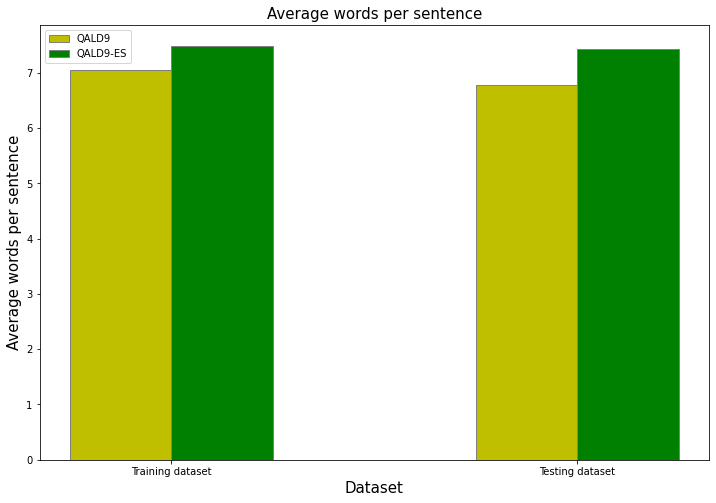

In [100]:
plot_statistic('Average words per sentence', 'Average words per sentence')

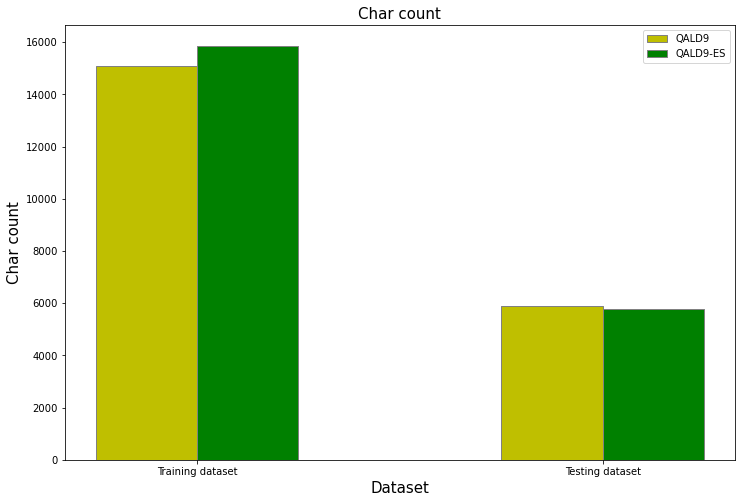

In [101]:
plot_statistic('Char count', 'Char count')

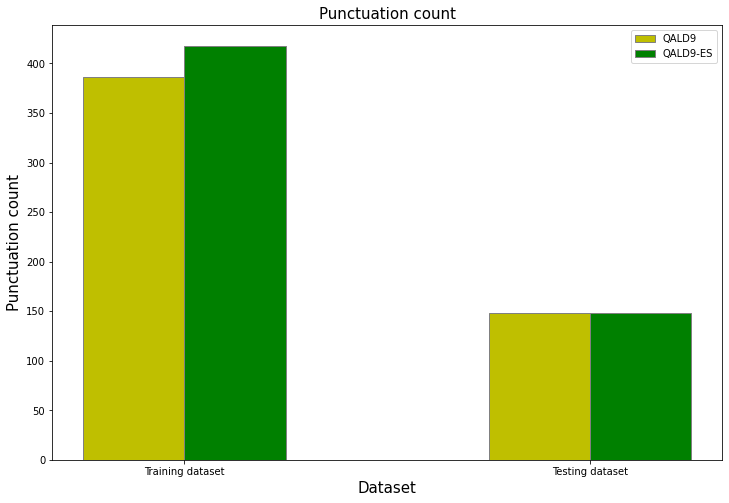

In [102]:
plot_statistic('Punctuation count', 'Punctuation count')

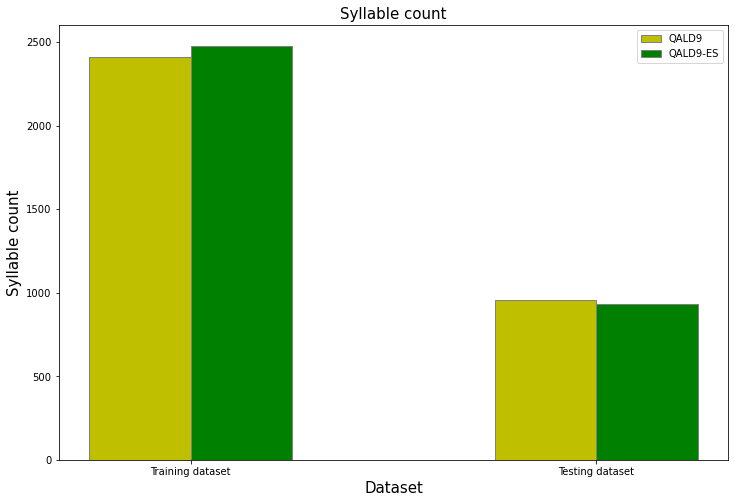

In [103]:
plot_statistic('Syllable count', 'Syllable count')

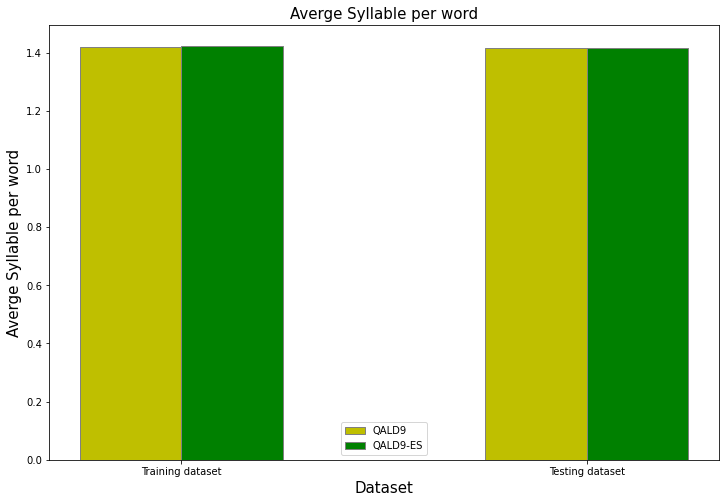

In [104]:
plot_statistic('Averge Syllable per word', 'Averge Syllable per word')


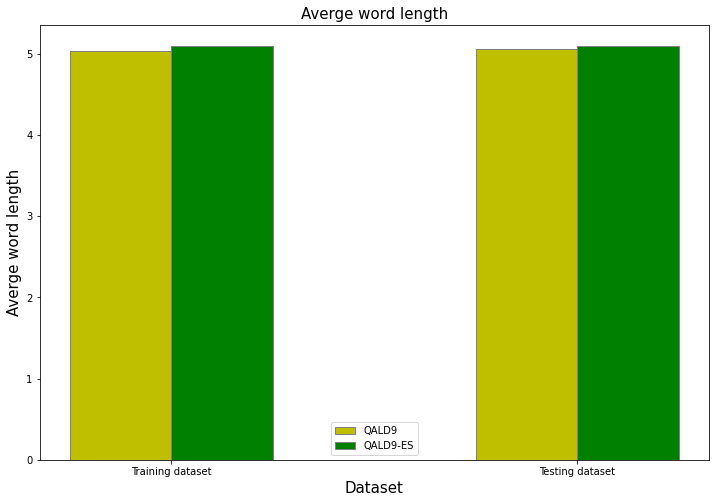

In [105]:
plot_statistic('Averge word length', 'Averge word length')

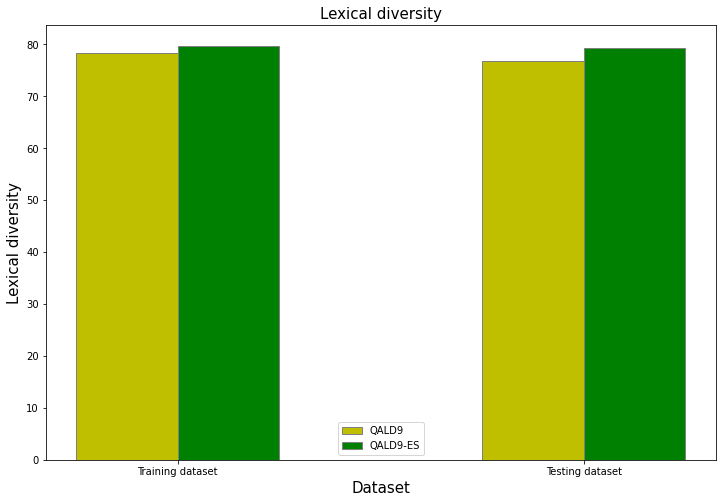

In [106]:
plot_statistic('Lexical diversity', 'Lexical diversity')


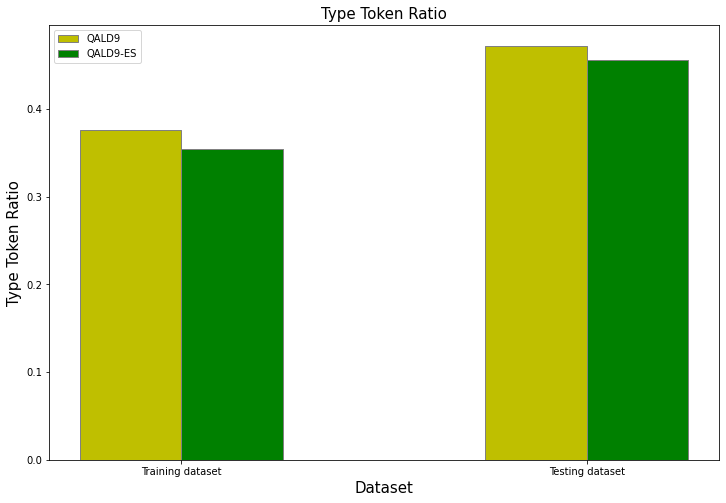

In [107]:
plot_statistic('Type Token Ratio', 'Type Token Ratio')
